## TN business data EDA

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install cufflinks
# !pip install seaborn
# !pip install chart_studio
# !pip install plotly
# !pip install scikit-learn

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import cufflinks as cf
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

import warnings
import re 

# Ignore all warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning:

TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning:

TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.



In [3]:
# reading the dataset 
df = pd.read_excel("business_data.xlsx")
df

,Business Name,Categories of Businesses,businesses categories type,Business Type,Size of Business,Year Established,Social Media Presence,Social Media,Social Media status,Revenue Range (Annual),Target Audience,Major Clients & Customer Base,Phone Number,Email Address,Website,Digital presence,Number of Employees,Location(TN),Address
0,ANANDHIYA INTERNATIONAL MARKETING PVT LTD,Retail & Wholesale Businesses,Food Processing,partership,large,2018,yes,Facebook,active,NaN,Both,international,+919025245455,support@anandhiya.in,https://www.anandhiya.in/,own web,11-15,Cuddalore,NaN
1,RHK studio,Photography,Event Photography,sole proprietorship,small,2019,yes,FB & insta,active,NaN,b2c,local,+91 7010754876,rhkstudio@outlook.com,https://rhkstudio.com/,own web,1-5,Cuddalore,NaN
2,Enoch computers,Retail & Wholesale Businesses,Electronics & Mobile Stores,sole proprietorship,medium,NaN,yes,Facebook,inactive,NaN,both,local,9367610951,NaN,https://magicpin.in/Cuddalore/Cuddalore/Electr...,third party,NaN,Cuddalore,NaN
3,Beyonfinity business solutions,Technology & IT Services,Software Development Companies,sole proprietorship,medium,1993,yes,Facebook,active,NaN,b2b,international,770-546-90190,info.beyonfinity@gmail.com,https://www.sulekha.com/beyonfinity-business-s...,third party,NaN,Cuddalore,NaN
4,the paver company,Construction & Real Estate,Interior Designers & Architects,sole proprietorship,medium,2011,NaN,NaN,NaN,NaN,b2b,local,+9162228844,NaN,https://www.yelu.in/company/964854/the-paver-c...,third party,500-1000,Cuddalore,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Sundaravel Match Industries Private Limited,Manufacturing,"Manufacturers and Exporters of Safety Matches,...",Limited Liability partnership,medium,1972,no,NaN,NaN,NaN,b2b,international,+91 4562 272147,enquiry@sundaravelgroup.com,https://www.sundaravelgroup.com/,own web,5000,Sivakasi,"69\nA.S.K. Thangaiah Nadar Road,Sivakasi 626123"
696,Wedding Aaha,Hospitality Industry,"Event Oraganiser, Corporate Events, Birthday ...",Limited Liability partnership,medium,2012,yes,"X,fb & insta",active,NaN,b2b,local,+91 9940662455,info@weddingaaha.com,https://www.weddingaaha.com/,own web,20-49,chennai,"A5 Ganesh Apartments\n52, N Mada St, Mylapore,..."
697,Taj Connemara Hotel,Hospitality Industry,Hotels & Restaurants,partership,large,1902,NaN,NaN,NaN,NaN,Both,local,+91 44 66000000,contacttaj@tajhotels.com,https://www.tajhotels.com/en-in,own web,500-999,chennai,"Binny Road,Chennai 600002"
698,Hotel Shelter,Hospitality Industry,Hotels & Restaurants,NaN,medium,NaN,yes,"X,fb & insta",active,NaN,b2c,local,+91 9840423939,reserve@hotelshelter.com,https://www.hotelshelter.com/,own web,NaN,chennai,"19,20 & 21,Venkatesa Agraharam Street,\n(Opp.S..."


## Data cleaning process 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Business Name                  700 non-null    object
 1   Categories of Businesses       700 non-null    object
 2   businesses  categories type    700 non-null    object
 3   Business Type                  438 non-null    object
 4   Size of Business               699 non-null    object
 5   Year Established               447 non-null    object
 6   Social Media Presence          667 non-null    object
 7    Social Media                  429 non-null    object
 8    Social Media status           452 non-null    object
 9   Revenue Range (Annual)         91 non-null     object
 10  Target Audience                699 non-null    object
 11  Major Clients & Customer Base  699 non-null    object
 12  Phone Number                   592 non-null    object
 13  Email

In [5]:
#checking the data types
df.dtypes

Business Name                    object
Categories of Businesses         object
businesses  categories type      object
Business Type                    object
Size of Business                 object
Year Established                 object
Social Media Presence            object
 Social Media                    object
 Social Media status             object
Revenue Range (Annual)           object
Target Audience                  object
Major Clients & Customer Base    object
Phone Number                     object
Email Address                    object
Website                          object
Digital presence                 object
Number of Employees              object
Location(TN)                     object
Address                          object
dtype: object

In [6]:
# checking for null values
df.isnull().sum()

Business Name                      0
Categories of Businesses           0
businesses  categories type        0
Business Type                    262
Size of Business                   1
Year Established                 253
Social Media Presence             33
 Social Media                    271
 Social Media status             248
Revenue Range (Annual)           609
Target Audience                    1
Major Clients & Customer Base      1
Phone Number                     108
Email Address                    259
Website                            1
Digital presence                   1
Number of Employees              434
Location(TN)                       3
Address                           67
dtype: int64

In [7]:
# checking for duplicates
df.duplicated().sum()

0

In [8]:
## converting the string to lowercase
df.columns=df.columns.str.lower()

In [9]:
df.columns

Index(['business name', 'categories of businesses',
       'businesses  categories type', 'business type', 'size of business',
       'year established', 'social media presence', ' social media ',
       ' social media status', 'revenue range (annual)', 'target audience',
       'major clients & customer base', 'phone number', 'email address',
       'website ', 'digital presence', 'number of employees', 'location(tn)',
       'address'],
      dtype='object')

#### Handling missing values

In [10]:
df.isnull().sum()

business name                      0
categories of businesses           0
businesses  categories type        0
business type                    262
size of business                   1
year established                 253
social media presence             33
 social media                    271
 social media status             248
revenue range (annual)           609
target audience                    1
major clients & customer base      1
phone number                     108
email address                    259
website                            1
digital presence                   1
number of employees              434
location(tn)                       3
address                           67
dtype: int64

In [11]:
def extract_max_number(value):
    if pd.isna(value):
        return None  # Leave NaN as it is
    numbers = re.findall(r'\d+(?:,\d+)*', str(value))
    numbers = [int(num.replace(',', '')) for num in numbers]
    if numbers:
        return max(numbers)
    else:
        return None

# Apply to your column
df['revenue range (annual)'] = df['revenue range (annual)'].apply(extract_max_number).astype('float')

In [12]:
# Filling NaN with Median value
df['revenue range (annual)'] = df['revenue range (annual)'].fillna(df['revenue range (annual)'].median())

In [13]:
df[' social media status'] = df[' social media status'].fillna('inactive')

In [14]:
df[' social media status'].unique()

array(['active', 'inactive'], dtype=object)

In [15]:
df['social media presence'].unique()

array(['yes', nan, 'no'], dtype=object)

In [16]:
df['social media presence'] = df['social media presence'].fillna('no')

In [17]:
df[' social media '].unique()

array(['Facebook', 'FB & insta', nan, 'insta', 'linkedin', 'X,fb & insta',
       "what'sapp", 'fb & insta', 'fb & linkdin', 'fb', 'fb&insta',
       'facebook'], dtype=object)

In [18]:
df[' social media '] = df[' social media '].replace('Facebook', 'facebook')
df[' social media '] = df[' social media '].replace('fb&insta', 'fb & insta')
df[' social media '] = df[' social media '].replace('FB & insta', 'fb & insta')
df[' social media '] = df[' social media '].replace('fb', 'facebook')

In [19]:
df[' social media '].unique()

array(['facebook', 'fb & insta', nan, 'insta', 'linkedin', 'X,fb & insta',
       "what'sapp", 'fb & linkdin'], dtype=object)

In [20]:
df[' social media '] = df[' social media '].fillna('not available')

In [21]:
df[' social media '].unique()

array(['facebook', 'fb & insta', 'not available', 'insta', 'linkedin',
       'X,fb & insta', "what'sapp", 'fb & linkdin'], dtype=object)

In [22]:
df['business type'].unique()

array(['partership', 'sole proprietorship', nan, 'others',
       'Corporation/Limited Liability Company', 'limited company',
       'Public Limited Company', 'Private Limited Company',
       'Limited Liability partnership', 'Public Limited Company\u200b',
       '\tPublic Limited Company', 'Central Public Sector Undertaking',
       'Private Conglomerate'], dtype=object)

In [23]:
df['business type'] = df['business type'].replace('Public Limited Company\u200b', 'Public Limited Company')
df['business type'] = df['business type'].replace('\tPublic Limited Company', 'Public Limited Company')

In [24]:
df['business type'] = df['business type'].fillna('not available')

In [25]:
df['business type'].unique()

array(['partership', 'sole proprietorship', 'not available', 'others',
       'Corporation/Limited Liability Company', 'limited company',
       'Public Limited Company', 'Private Limited Company',
       'Limited Liability partnership',
       'Central Public Sector Undertaking', 'Private Conglomerate'],
      dtype=object)

In [26]:
df['size of business'].unique()

array(['large', 'small', 'medium', nan], dtype=object)

In [27]:
df['size of business'] = df['size of business'].fillna('medium')

In [28]:
df['year established'].dtypes

dtype('O')

In [29]:
df['year established'] = df['year established'].fillna('0000')

In [30]:
df['year established'] = df['year established'].str.extract(r'(\d+)')

In [31]:
df['year established'] = df['year established'].fillna('0000')

In [32]:
df['year established'] = df['year established'].astype(int)  # Convert to int
df['year established'].dtypes

dtype('int32')

In [33]:
df['target audience'].unique()

array(['Both', 'b2c', 'both', 'b2b', nan, 'b2n', 'b2'], dtype=object)

In [34]:
df['target audience'] = df['target audience'].replace('Both', 'both')
df['target audience'] = df['target audience'].replace('b2n', 'both')
df['target audience'] = df['target audience'].replace('b2', 'both')
df['target audience'] = df['target audience'].fillna('both')

In [35]:
df['target audience'].unique()

array(['both', 'b2c', 'b2b'], dtype=object)

In [36]:
df['major clients & customer base'].unique()

array(['international', 'local', nan, 'both'], dtype=object)

In [37]:
df['major clients & customer base'] = df['major clients & customer base'].fillna('both')

In [38]:
df['major clients & customer base'].unique()

array(['international', 'local', 'both'], dtype=object)

In [39]:
df['digital presence'].unique()

array(['own web', 'third party', 'own', nan, 'both'], dtype=object)

In [40]:
df['digital presence'] = df['digital presence'].replace('own', 'own web')
df['digital presence'] = df['digital presence'].fillna('third party')

In [41]:
df['digital presence'].unique()

array(['own web', 'third party', 'both'], dtype=object)

In [42]:
df['number of employees'].unique()

array(['11-15', '1-5', nan, '500-1000', '500', '20-50', '20', '50-100',
       '26-50', '10', '2-6', '200-250', '10-20', 'Na', '250', '0-9',
       '100-249', '2', '6', '14', '9', '26', '10-19', '50-99', '20-49',
       '249-599', '100-499', '500-999', '250-499', '100-299', '11-25',
       '0-10', '5-50', '1-10', '51-200', '2-10', '100-152', '1000-1250',
       1000, '1000-5000', '1500-2000', '3000-3500', '600-700',
       '1500-1800', '4000-4800', '60000 - 65000', '38000-38300',
       '3800-3900', '100-140', '0-15', '200-230', '240-260', '200-500',
       '30-50', '10-50', '100-130', '1000', '5000', '40-60', '1850-1900',
       '70-80', '650-670', '400-500', '5-20', '120-250', '750-780',
       '20-30', '3-10', '1750-1800', '240-250', '5-10', '2000-2100',
       '130-140', '120-140', '2300-2350', '250-500', '1000-4999',
       '980-1000', '840-860', '110-120', '380-400', '410-430',
       '10000-10500', '190-200', '250-270', '260-270', '3230-3250',
       '1020-1050', '15-20', '600-6

In [43]:
def convert_to_number(x):
    try:
        if pd.isnull(x):
            return np.nan  # keep NaN
        x = str(x).strip()
        if '-' in x:
            parts = x.split('-')
            if len(parts) == 2:
                low = int(parts[0].strip())
                high = int(parts[1].strip())
                return (low + high) // 2  # or low or high
        return int(x)  # if single value like '500'
    except:
        return np.nan  # if anything fails

df['number of employees'] = df['number of employees'].apply(convert_to_number)


In [44]:
mean_value = df['number of employees'].mean()
mean_value

917.8977272727273

In [45]:
mode_value = df['number of employees'].mode()[0]
df['number of employees'] = df['number of employees'].fillna(mode_value)

In [46]:
df['location(tn)'].unique()

array(['Cuddalore', 'Chennai', 'coimbatore', 'Trichy,chennai', 'Trichy',
       'chengalpattu', 'Tirunelveli', 'Salem', 'Erode', 'Tiruvannamalai',
       'Madurai', 'Nilgiris', 'chennai', 'Karaikudi', 'Namakkal',
       'Krishnagiri', 'Thiruvarur', 'Kanya kumari', 'Rajapalayam',
       'Thoothukudi', 'Virudhunagr', 'Kancheepuram', 'Tuticorin',
       'trichy', 'thindal', 'madurai', 'Sivagangai', 'Thanjavur',
       'Pudukottai', 'Kodaikanal', 'Tirupur', 'Thiruvallur', 'Dharmapuri',
       'Karur', 'Nagercoil', 'vellore', 'Bengaluru', 'Dindigul', 'Hosur',
       'pondichery', 'Sivakasi', nan, 'karur', 'Auroville', 'Kanchipuram',
       'ramanathapuram'], dtype=object)

In [47]:
df['location(tn)'] = df['location(tn)'].replace('Chennai', 'chennai')

In [48]:
df['location(tn)'] = df['location(tn)'].replace('Kancheepuram', 'Kanchipuram')
df['location(tn)'] = df['location(tn)'].replace('Karur', 'karur')
df['location(tn)'] = df['location(tn)'].replace('Thoothukudi', 'Tuticorin')
df['location(tn)'] = df['location(tn)'].replace('Trichy', 'trichy')
df['location(tn)'] = df['location(tn)'].replace('thindal', 'Dindigul')
df['location(tn)'] = df['location(tn)'].fillna('not available')

In [49]:
df['location(tn)'].unique(),df['location(tn)'].nunique()

(array(['Cuddalore', 'chennai', 'coimbatore', 'Trichy,chennai', 'trichy',
        'chengalpattu', 'Tirunelveli', 'Salem', 'Erode', 'Tiruvannamalai',
        'Madurai', 'Nilgiris', 'Karaikudi', 'Namakkal', 'Krishnagiri',
        'Thiruvarur', 'Kanya kumari', 'Rajapalayam', 'Tuticorin',
        'Virudhunagr', 'Kanchipuram', 'Dindigul', 'madurai', 'Sivagangai',
        'Thanjavur', 'Pudukottai', 'Kodaikanal', 'Tirupur', 'Thiruvallur',
        'Dharmapuri', 'karur', 'Nagercoil', 'vellore', 'Bengaluru',
        'Hosur', 'pondichery', 'Sivakasi', 'not available', 'Auroville',
        'ramanathapuram'], dtype=object),
 40)

In [50]:
df.isnull().sum()

business name                      0
categories of businesses           0
businesses  categories type        0
business type                      0
size of business                   0
year established                   0
social media presence              0
 social media                      0
 social media status               0
revenue range (annual)             0
target audience                    0
major clients & customer base      0
phone number                     108
email address                    259
website                            1
digital presence                   0
number of employees                0
location(tn)                       0
address                           67
dtype: int64

In [51]:
#checking data types 
df.dtypes

business name                     object
categories of businesses          object
businesses  categories type       object
business type                     object
size of business                  object
year established                   int32
social media presence             object
 social media                     object
 social media status              object
revenue range (annual)           float64
target audience                   object
major clients & customer base     object
phone number                      object
email address                     object
website                           object
digital presence                  object
number of employees              float64
location(tn)                      object
address                           object
dtype: object

#### droppoing unwanted columns 

In [52]:
df.head(5)

,business name,categories of businesses,businesses categories type,business type,size of business,year established,social media presence,social media,social media status,revenue range (annual),target audience,major clients & customer base,phone number,email address,website,digital presence,number of employees,location(tn),address
0,ANANDHIYA INTERNATIONAL MARKETING PVT LTD,Retail & Wholesale Businesses,Food Processing,partership,large,0,yes,facebook,active,8.0,both,international,+919025245455,support@anandhiya.in,https://www.anandhiya.in/,own web,13.0,Cuddalore,NaN
1,RHK studio,Photography,Event Photography,sole proprietorship,small,0,yes,fb & insta,active,8.0,b2c,local,+91 7010754876,rhkstudio@outlook.com,https://rhkstudio.com/,own web,3.0,Cuddalore,NaN
2,Enoch computers,Retail & Wholesale Businesses,Electronics & Mobile Stores,sole proprietorship,medium,0,yes,facebook,inactive,8.0,both,local,9367610951,NaN,https://magicpin.in/Cuddalore/Cuddalore/Electr...,third party,14.0,Cuddalore,NaN
3,Beyonfinity business solutions,Technology & IT Services,Software Development Companies,sole proprietorship,medium,0,yes,facebook,active,8.0,b2b,international,770-546-90190,info.beyonfinity@gmail.com,https://www.sulekha.com/beyonfinity-business-s...,third party,14.0,Cuddalore,NaN
4,the paver company,Construction & Real Estate,Interior Designers & Architects,sole proprietorship,medium,0,no,not available,inactive,8.0,b2b,local,+9162228844,NaN,https://www.yelu.in/company/964854/the-paver-c...,third party,750.0,Cuddalore,NaN


In [53]:
df.drop(columns=['address','phone number','email address'],inplace=True)

In [54]:
df.drop(columns=[' social media '],inplace=True)

In [55]:
df.drop(columns=['website '],inplace=True)

In [56]:
df.head()

,business name,categories of businesses,businesses categories type,business type,size of business,year established,social media presence,social media status,revenue range (annual),target audience,major clients & customer base,digital presence,number of employees,location(tn)
0,ANANDHIYA INTERNATIONAL MARKETING PVT LTD,Retail & Wholesale Businesses,Food Processing,partership,large,0,yes,active,8.0,both,international,own web,13.0,Cuddalore
1,RHK studio,Photography,Event Photography,sole proprietorship,small,0,yes,active,8.0,b2c,local,own web,3.0,Cuddalore
2,Enoch computers,Retail & Wholesale Businesses,Electronics & Mobile Stores,sole proprietorship,medium,0,yes,inactive,8.0,both,local,third party,14.0,Cuddalore
3,Beyonfinity business solutions,Technology & IT Services,Software Development Companies,sole proprietorship,medium,0,yes,active,8.0,b2b,international,third party,14.0,Cuddalore
4,the paver company,Construction & Real Estate,Interior Designers & Architects,sole proprietorship,medium,0,no,inactive,8.0,b2b,local,third party,750.0,Cuddalore


In [57]:
df.to_excel("business_data_cleaned.xlsx", index=False)

In [58]:
df.head()

,business name,categories of businesses,businesses categories type,business type,size of business,year established,social media presence,social media status,revenue range (annual),target audience,major clients & customer base,digital presence,number of employees,location(tn)
0,ANANDHIYA INTERNATIONAL MARKETING PVT LTD,Retail & Wholesale Businesses,Food Processing,partership,large,0,yes,active,8.0,both,international,own web,13.0,Cuddalore
1,RHK studio,Photography,Event Photography,sole proprietorship,small,0,yes,active,8.0,b2c,local,own web,3.0,Cuddalore
2,Enoch computers,Retail & Wholesale Businesses,Electronics & Mobile Stores,sole proprietorship,medium,0,yes,inactive,8.0,both,local,third party,14.0,Cuddalore
3,Beyonfinity business solutions,Technology & IT Services,Software Development Companies,sole proprietorship,medium,0,yes,active,8.0,b2b,international,third party,14.0,Cuddalore
4,the paver company,Construction & Real Estate,Interior Designers & Architects,sole proprietorship,medium,0,no,inactive,8.0,b2b,local,third party,750.0,Cuddalore


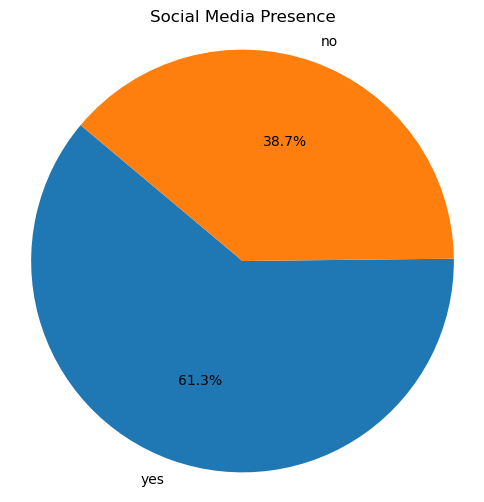

In [60]:
social_counts = df['social media presence'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(social_counts, labels=social_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Social Media Presence')
plt.axis('equal')
plt.show()


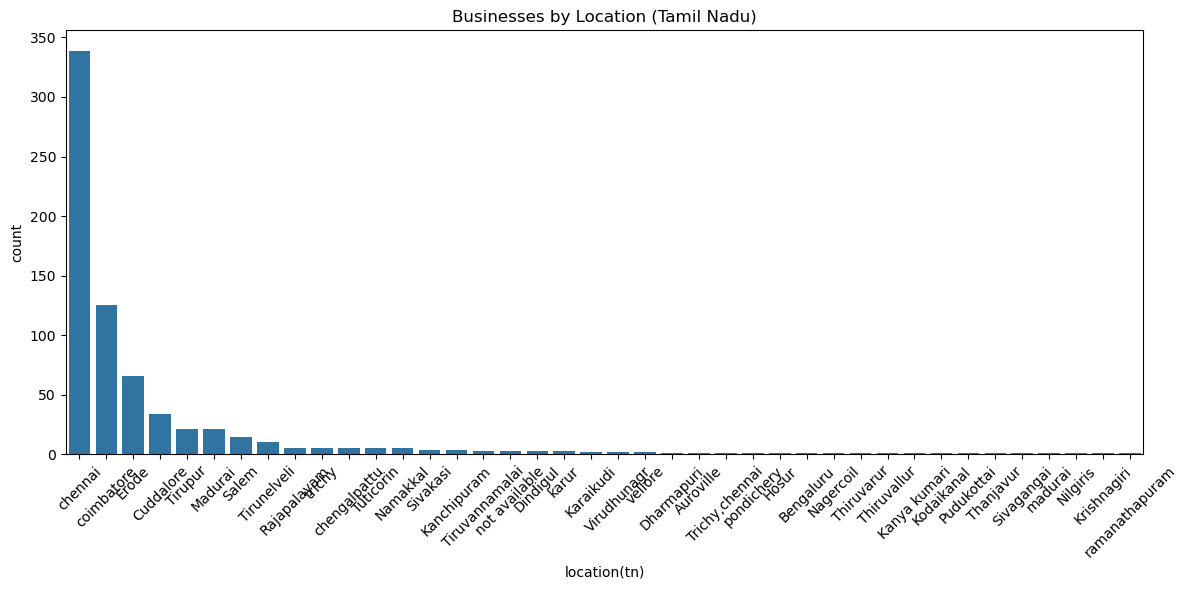

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='location(tn)', order=df['location(tn)'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Businesses by Location (Tamil Nadu)')
plt.tight_layout()
plt.show()


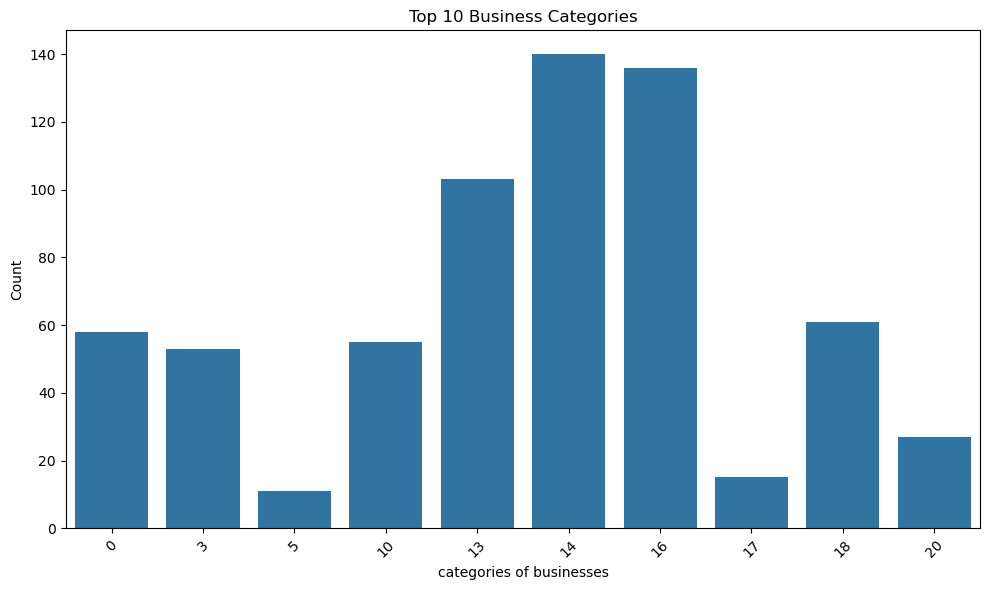

In [86]:
category_counts = df.groupby('categories of businesses').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top 10 Business Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Label encoding the cat column 

In [85]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [78]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [79]:
for col in categorical_columns:
     df[col] = LE.fit_transform(df[col])

In [80]:
df.head()

,business name,categories of businesses,businesses categories type,business type,size of business,year established,social media presence,social media status,revenue range (annual),target audience,major clients & customer base,digital presence,number of employees,location(tn)
0,32,16,57,9,0,0,1,0,8.00,2,1,1,13.00,2
1,474,15,47,10,2,0,1,0,8.00,1,2,1,3.00,2
2,232,16,40,10,1,0,1,1,8.00,2,2,2,14.00,2
3,126,18,202,10,1,0,1,0,8.00,0,1,2,14.00,2
4,684,3,81,10,1,0,0,1,8.00,0,2,2,750.00,2


#### statistical analysis

In [81]:
pd.options.display.float_format = '{:.2f}'.format
df.describe() 

,business name,categories of businesses,businesses categories type,business type,size of business,year established,social media presence,social media status,revenue range (annual),target audience,major clients & customer base,digital presence,number of employees,location(tn)
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,346.41,12.36,102.18,7.09,1.09,22.54,0.61,0.47,142.53,1.09,1.63,1.40,354.90,25.27
std,199.10,5.78,81.58,2.38,0.61,209.80,0.49,0.50,1361.35,0.91,0.58,0.49,2865.16,10.46
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00
25%,173.75,10.00,38.00,5.00,1.00,0.00,0.00,0.00,8.00,0.00,1.00,1.00,14.00,24.00
50%,347.50,14.00,70.50,7.00,1.00,0.00,1.00,0.00,8.00,1.00,2.00,1.00,14.00,31.00
75%,521.25,16.00,181.00,10.00,1.00,0.00,1.00,1.00,8.00,2.00,2.00,2.00,20.00,31.00
max,688.00,24.00,257.00,10.00,2.00,1994.00,1.00,1.00,20000.00,2.00,2.00,2.00,62500.00,39.00


In [82]:
### checking skewness of the data 
df.skew()

business name                   -0.02
categories of businesses        -0.89
businesses  categories type      0.55
business type                   -0.39
size of business                -0.04
year established                 9.21
social media presence           -0.46
 social media status             0.14
revenue range (annual)          12.62
target audience                 -0.17
major clients & customer base   -1.28
digital presence                 0.37
number of employees             18.05
location(tn)                    -1.31
dtype: float64

In [83]:
df.corr()

,business name,categories of businesses,businesses categories type,business type,size of business,year established,social media presence,social media status,revenue range (annual),target audience,major clients & customer base,digital presence,number of employees,location(tn)
business name,1.00,-0.07,0.00,-0.02,-0.05,-0.05,-0.09,0.10,-0.07,0.02,-0.07,-0.06,-0.04,-0.10
categories of businesses,-0.07,1.00,0.02,-0.18,-0.04,0.06,-0.05,0.08,0.03,-0.30,-0.17,-0.04,-0.02,0.06
businesses categories type,0.00,0.02,1.00,-0.13,0.07,0.07,0.02,-0.01,0.01,-0.16,-0.05,0.04,0.03,0.03
business type,-0.02,-0.18,-0.13,1.00,0.20,-0.10,-0.05,-0.02,-0.12,0.38,0.27,0.25,-0.12,-0.21
size of business,-0.05,-0.04,0.07,0.20,1.00,-0.04,-0.13,0.10,-0.17,0.22,0.37,0.28,-0.18,-0.20
year established,-0.05,0.06,0.07,-0.10,-0.04,1.00,0.06,-0.05,0.04,-0.11,-0.05,-0.06,0.01,0.05
social media presence,-0.09,-0.05,0.02,-0.05,-0.13,0.06,1.00,-0.85,0.06,0.03,-0.06,-0.29,0.07,0.09
social media status,0.10,0.08,-0.01,-0.02,0.10,-0.05,-0.85,1.00,-0.08,-0.06,0.02,0.26,-0.07,-0.11
revenue range (annual),-0.07,0.03,0.01,-0.12,-0.17,0.04,0.06,-0.08,1.00,-0.02,-0.11,-0.08,0.78,0.02
target audience,0.02,-0.30,-0.16,0.38,0.22,-0.11,0.03,-0.06,-0.02,1.00,0.38,0.13,-0.01,-0.22


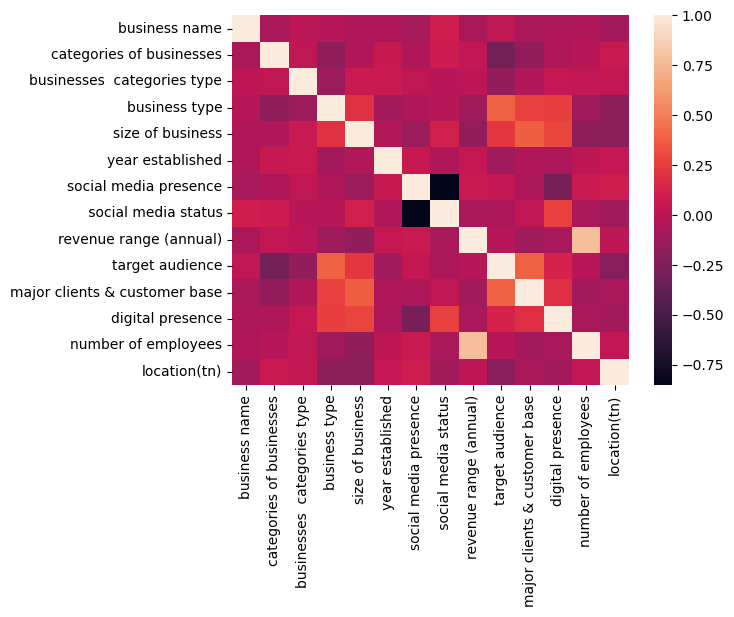

In [84]:
sns.heatmap(df.corr())
plt.show()